In [4]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)
query="""SELECT 
    ROUND(SUM(CAST(discounted_price AS NUMERIC)), 2) AS total_revenue
FROM amazon_sales;
"""
df=pd.read_sql(query,conn)
conn.close()
df


C:\Users\anshi\AppData\Local\Temp\ipykernel_230532\3524884639.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


,total_revenue
0,4578580.43


C:\Users\anshi\AppData\Local\Temp\ipykernel_230532\3434256408.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


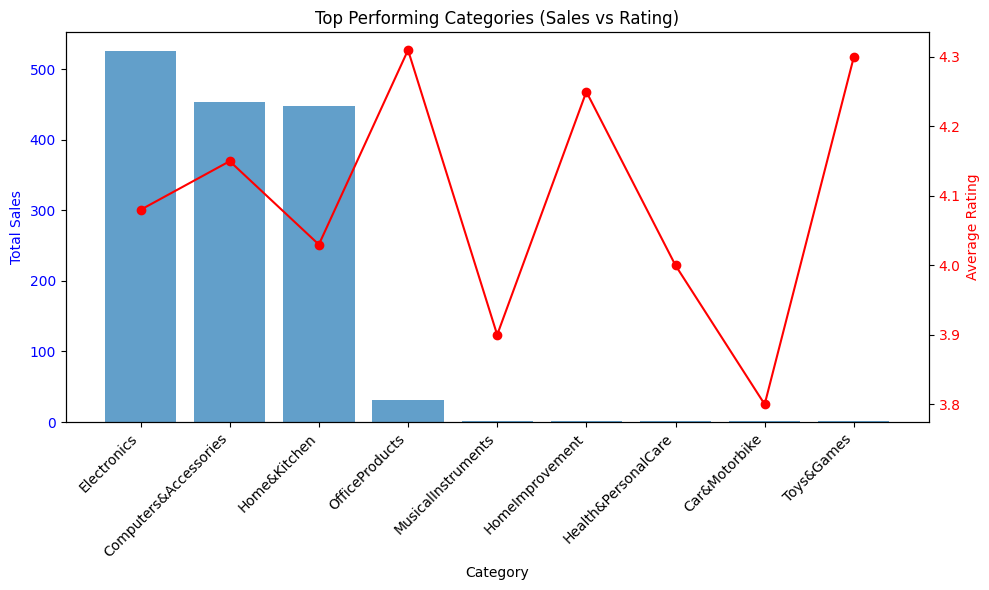

In [7]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# Query to get top performing categories
query = """
SELECT 
    regexp_replace(Category, '\|.*$', '') AS trimmed_category,
    COUNT(*) AS total_sales,
    ROUND(AVG(CAST(rating AS NUMERIC)), 2) AS avg_rating
FROM amazon_sales
GROUP BY trimmed_category
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for total sales
ax1.bar(df['trimmed_category'], df['total_sales'], label='Total Sales', alpha=0.7)
ax1.set_xlabel("Category")
ax1.set_ylabel("Total Sales", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

# Line chart for average rating
ax2 = ax1.twinx()
ax2.plot(df['trimmed_category'], df['avg_rating'], color='red', marker='o', label='Avg Rating')
ax2.set_ylabel("Average Rating", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title("Top Performing Categories (Sales vs Rating)")
fig.tight_layout()
plt.show()
